In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 개요
- PCA는 현재의 기저보다 데이터를 잘 데이터를 잘 표현할 수 있는 새로운 직교 기저를 찾고 해당 기저들로 Projection 하여 저차원 Hyper Plane으로 데이터를 표현하는 방법이다.
- Projection 시킬 기저는 다음 2가지 조건을 만족시켜야한다.
    1. 각 기저에 Projection 시켰을 때 분산이 최대가 되어야한다.<br>
        - 그래야지만 저차원 Hyper Plane으로 Projection 시켰을 때 손실되는 정보량을 최소화하며 저차원, 독립적으로 데이터를 표현할 수 있다.
    2. 유닛 벡터여야한다.<br>
        - 그래야지 데이터를 해당 기저로 Projection 했을 때 새로운 기저에 대한 주소(좌표)를 쉽게 파악할 수 있다.

### 2. 에 대해서 조금 더 살펴보자.

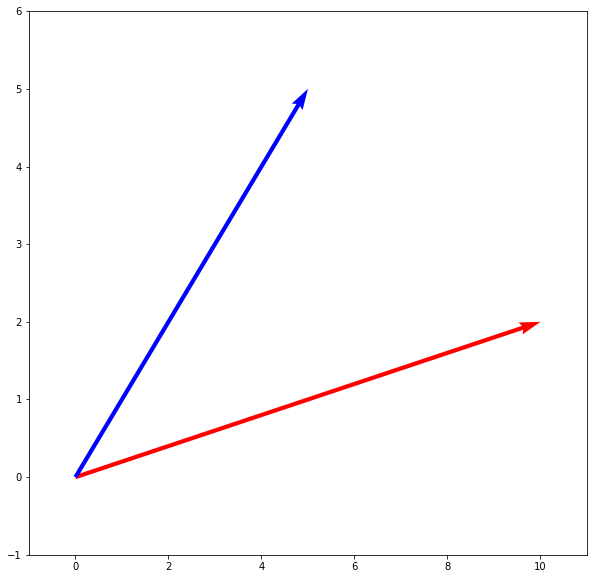

In [30]:
plt.figure(figsize=(10,10))
plt.quiver([0, 0], [0, 0], [10, 5], [2, 5], angles='xy', scale_units='xy', scale=1, color = ['r','b'])
plt.xlim(-1, 11)
plt.ylim(-1, 6)
plt.show()

위의 벡터들은 e1 = (1,0), e2 = (0,1) 기저 상에서 v = (10,2), u = (5,5)란 좌표값을 갖는다. 그런데 파란색 벡터를 빨간색 벡터로 Projection 시킨 후 표현하면 어떻게 될까? 먼저 해당 벡터로 projection 시켜보기 위해서 $\alpha\vec{v}$ 는 u를 v로 projection 한 벡터라 가정해보자. 그렇다면 다음과 같이 표현할 수 있다.

- $v^T$$\cdot$(u - $\alpha$v) = 0

- $v^T\cdot$u - $\alpha$$v^T$v = 0

- $\alpha$ = $v^T\cdot$u / $v^T$v

따라서 $\alpha$ 는 60 / 104 이다. 이를 표현해보자.

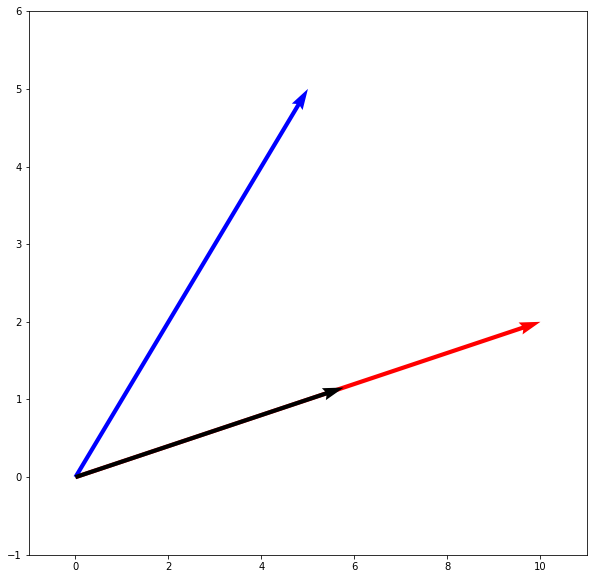

In [51]:
plt.figure(figsize=(10,10))
plt.quiver([0, 0, 0], [0, 0, 0], [10, 5, 10 * 60/104], [2, 5, 2 *60/104], angles='xy', scale_units='xy', scale=1, color = ['r','b', 'Black'])
plt.xlim(-1, 11)
plt.ylim(-1, 6)
plt.show()

- 직교가 되는가? 된다. 다만, u와 v의 내적으로만 되는 것이 아니라 프로젝션 대상인 v의 내적 값 또한 스케일링 스칼라로 필요하다. 그런데 v가 유닛 벡터라면 v의 내적값은 1이 되고 분모가 1이 된다면 별도의 스케일링 스칼라를 구할 필요가 없이 내적만으로 우리는 값을 알 수 있다. 그렇기에 유닛 벡터라고 가정을 하는 것이다.

In [52]:
120/104 == 15/13

True